In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


india_df = pd.read_csv('../data/Unemployment in India.csv')
covid_df = pd.read_csv('../data/Unemployment_Rate_upto_11_2020.csv')


india_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
# Standardize column names
india_df.columns = india_df.columns.str.strip()
covid_df.columns = covid_df.columns.str.strip()


# Convert Date to datetime
india_df['Date'] = pd.to_datetime(india_df['Date'])
covid_df['Date'] = pd.to_datetime(covid_df['Date'])


# Handle missing values
india_df.isnull().sum()
india_df.dropna(inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_13444\3386130335.py:7: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  india_df['Date'] = pd.to_datetime(india_df['Date'])
C:\Users\bhara\AppData\Local\Temp\ipykernel_13444\3386130335.py:8: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  covid_df['Date'] = pd.to_datetime(covid_df['Date'])


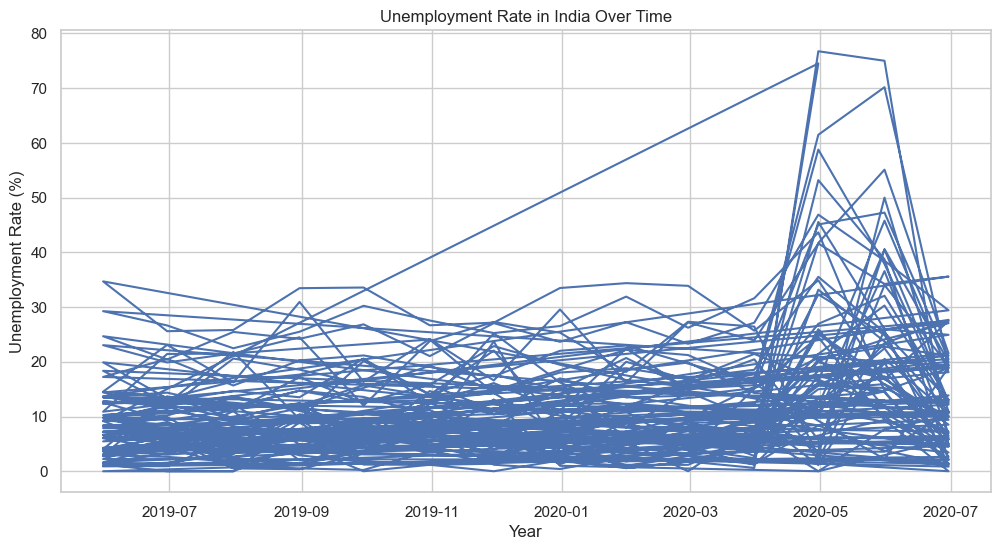

In [4]:
plt.figure(figsize=(12,6))
plt.plot(india_df['Date'], india_df['Estimated Unemployment Rate (%)'])
plt.title('Unemployment Rate in India Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()

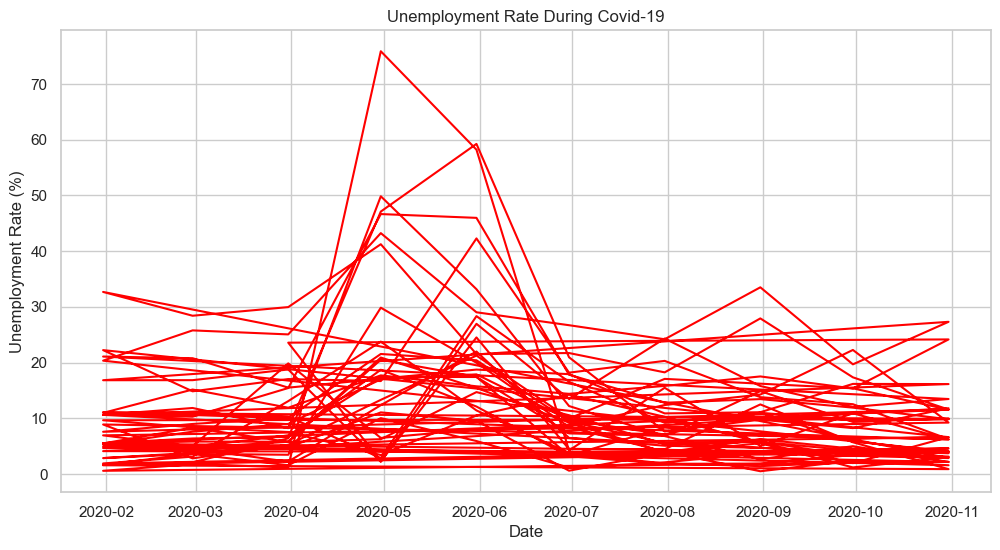

In [5]:
plt.figure(figsize=(12,6))
plt.plot(covid_df['Date'], covid_df['Estimated Unemployment Rate (%)'], color='red')
plt.title('Unemployment Rate During Covid-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

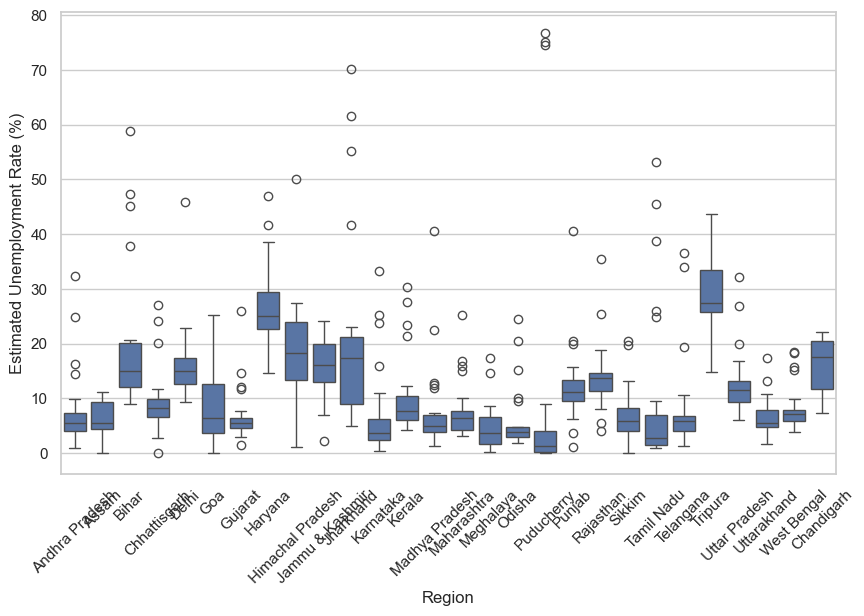

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=india_df)
plt.xticks(rotation=45)
plt.show()

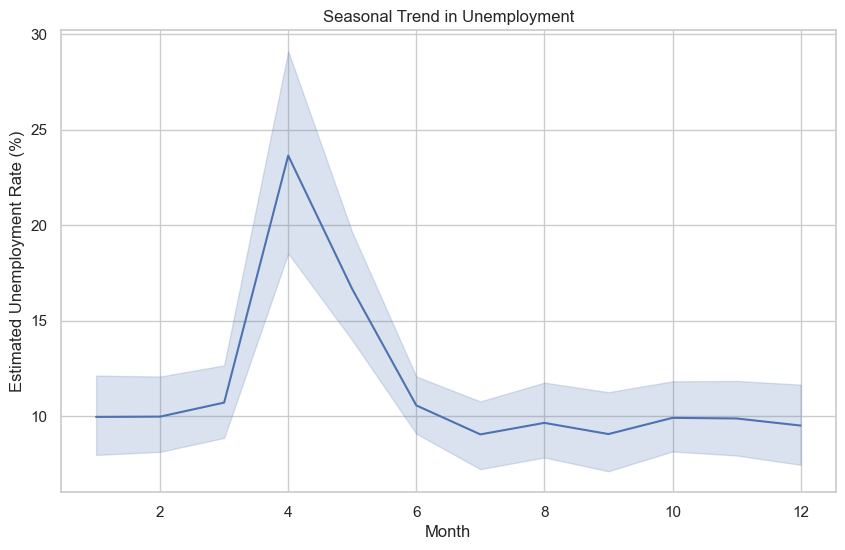

In [7]:
india_df['Month'] = india_df['Date'].dt.month


plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', data=india_df)
plt.title('Seasonal Trend in Unemployment')
plt.show()

In [8]:
import plotly.express as px


fig = px.line(
india_df,
x='Date',
y='Estimated Unemployment Rate (%)',
title='Interactive Unemployment Rate Trend in India',
markers=True
)


fig.update_layout(
xaxis_title='Date',
yaxis_title='Unemployment Rate (%)',
hovermode='x unified'
)


fig.show()

In [9]:
fig = px.box(
india_df,
x='Region',
y='Estimated Unemployment Rate (%)',
title='Region-wise Unemployment Distribution'
)


fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [10]:
fig = px.line(
covid_df,
x='Date',
y='Estimated Unemployment Rate (%)',
title='Covid-19 Impact on Unemployment Rate',
color_discrete_sequence=['red']
)


fig.add_vrect(
x0='2020-03-25', x1='2020-06-30',
fillcolor='orange', opacity=0.2,
annotation_text='Lockdown Period', annotation_position='top left'
)


fig.show()

In [11]:
fig = px.line(
india_df,
x='Month',
y='Estimated Unemployment Rate (%)',
title='Seasonal Unemployment Trend',
markers=True
)


fig.show()